# Lista - Sistemas Nebulosos
## Felipe Bartelt de Assis Pessoa - 2016026841
***

In [8]:
import numpy as np
import sys
from plotly.subplots import make_subplots
import plotly
print(f'Python version: {sys.version}\nNumpy version: {np.__version__}\nPlotly version: {plotly.__version__}')

Python version: 3.9.7 (default, Oct 10 2021, 15:13:22) 
[GCC 11.1.0]
Numpy version: 1.21.2
Plotly version: 5.3.1


# Função de Pertinência Triangular
$$
\mu(x;a,b,c)=\begin{cases} 0,& x\le a\\ \frac{x-a}{b-a}, & a\le x\le b\\ \frac{c-x}{c-b}, & b\le x\le c\\0,& c\le x\end{cases}
= \max\left(\min\left(\frac{x-a}{b-a}, \frac{c-x}{c-b}\right), 0\right)
$$

In [9]:
def trimf(x, a, b, c):
    return np.maximum(np.minimum((x - a) / (b - a), (c - x) / (c - b)), 0)

## Teste

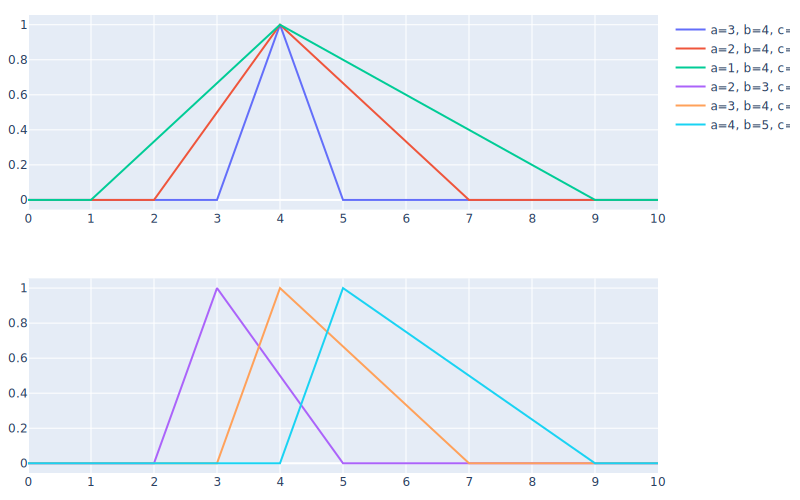

In [14]:
x = np.arange(0, 10.1, 0.1)
params = [(3, 4, 5), (2, 4, 7), (1, 4, 9), (2, 3, 5), (3, 4, 7), (4, 5, 9)]

fig = make_subplots(rows=2, cols=1)

for i, p in enumerate(params):
    a, b, c = p
    y = trimf(x, a, b, c)
    fig.add_scatter(x=x, y=y, name=f'a={a}, b={b}, c={c}', row=2**(i>2), col=1)
    
fig.update_layout(margin=dict(l=10,r=10,b=15,t=15), xaxis=dict(dtick=1), xaxis2=dict(dtick=1))
fig.show(renderer='svg', width=800, height=500)

# Função de Pertinência Trapezoidal
$$
\mu(x;a,b,c)=\begin{cases} 0,& x\le a\\ \frac{x-a}{b-a}, & a\le x\le b\\ 1, & b\le x\le c\\\frac{d-x}{d-c}, & c\le x\le d\\0,& c\le x\end{cases}
= \max\left(\min\left(\min\left(\frac{x-a}{b-a}, \frac{d-x}{d-c}\right), 1\right), 0\right)
$$

In [15]:
def trapmf(x, a, b, c, d):
    min1 = np.minimum((x - a) / (b - a), (d - x) / (d - c))
    return np.maximum(np.minimum(min1, 1), 0)

## Teste

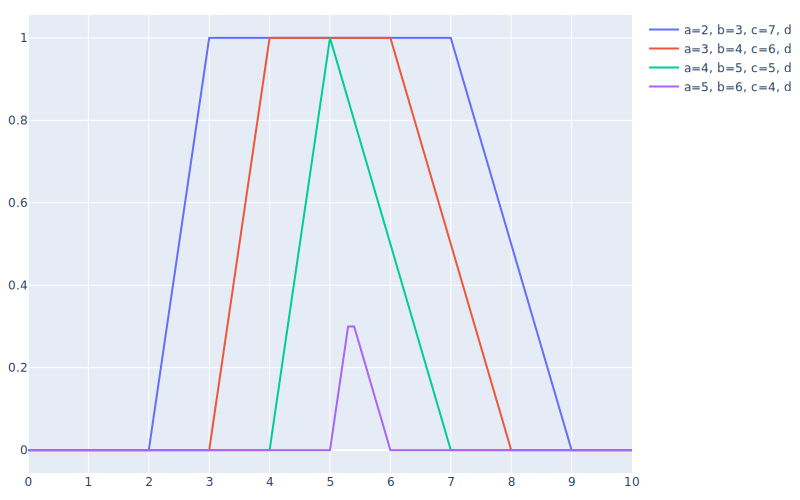

In [16]:
x = np.arange(0, 10.1, 0.1)
params = [(2, 3, 7, 9), (3, 4, 6, 8), (4, 5, 5, 7), (5, 6, 4, 6)]

fig = make_subplots(rows=1, cols=1)

for i, p in enumerate(params):
    a, b, c, d = p
    y = trapmf(x, a, b, c, d)
    fig.add_scatter(x=x, y=y, name=f'a={a}, b={b}, c={c}, d={d}', row=1, col=1)
    
fig.update_layout(margin=dict(l=10,r=10,b=15,t=15), xaxis=dict(dtick=1), xaxis2=dict(dtick=1))
fig.show(renderer='svg', width=800, height=500)

# Função de Pertinência Gaussiana
$$
\mu(x;c,\sigma) = \Large e^{\left(-\frac{1}{2}\left(\frac{x-c}{\sigma}\right)^2\right)}
$$

In [17]:
def gaussmf(x, c, sigma):
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

## Teste

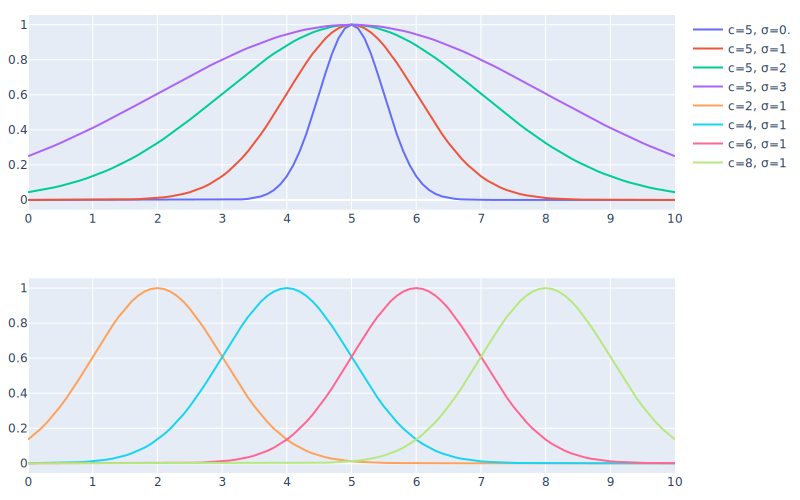

In [18]:
x = np.arange(0, 10.1, 0.1)
params = [(5, 0.5), (5, 1), (5, 2), (5, 3), (2, 1), (4, 1), (6, 1), (8, 1)]

fig = make_subplots(rows=2, cols=1)

for i, p in enumerate(params):
    c, sigma = p
    y = gaussmf(x, c, sigma)
    fig.add_scatter(x=x, y=y, name=f'c={c}, σ={sigma}', row=2**(i>3), col=1)
    
fig.update_layout(margin=dict(l=10,r=10,b=15,t=15), xaxis=dict(dtick=1), xaxis2=dict(dtick=1))
fig.show(renderer='svg', width=800, height=500)

# Função de Pertinência Sino Generalizada
$$
\mu(x;a,b,c) = \frac{1}{1+\left|\frac{x-c}{a}\right|^{2b}}
$$

In [19]:
def gbellmf(x, c, sigma, inc):
    return 1 / (1 + np.abs((x - c) / sigma) ** (2 * inc))

## Teste

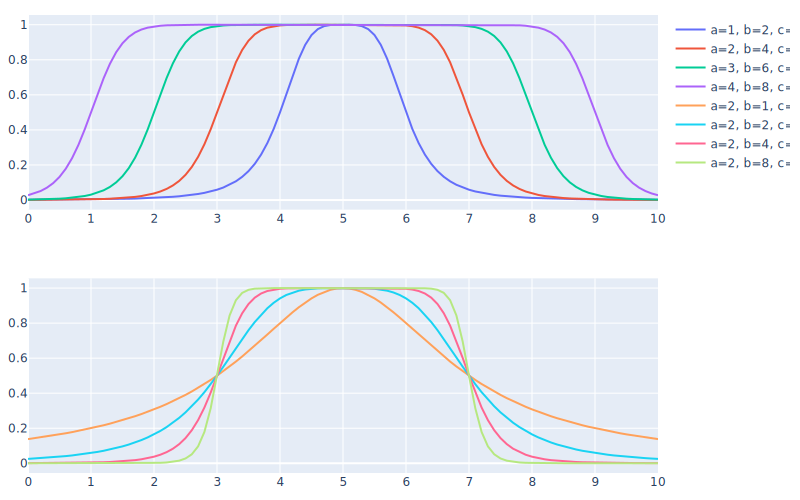

In [20]:
x = np.arange(0, 10.1, 0.1)
params = [(5, 1, 2), (5, 2, 4), (5, 3, 6), (5, 4, 8), (5, 2, 1), (5, 2, 2), (5, 2, 4), (5, 2, 8)]

fig = make_subplots(rows=2, cols=1)

for i, p in enumerate(params):
    c, sigma, inc = p
    y = gbellmf(x, c, sigma, inc)
    fig.add_scatter(x=x, y=y, name=f'a={sigma}, b={inc}, c={c}', row=2**(i>3), col=1)
    
fig.update_layout(margin=dict(l=10,r=10,b=15,t=15), xaxis=dict(dtick=1), xaxis2=dict(dtick=1))
fig.show(renderer='svg', width=800, height=500)

# Função de Pertinência Sigmoidal
$$
\mu(x;a,c) = \frac{1}{1+e^{-a(x-c)}}
$$

In [21]:
def sigmf(x, a, c):
    return 1 / (1 + np.exp(-a * (x - c)))

## Teste

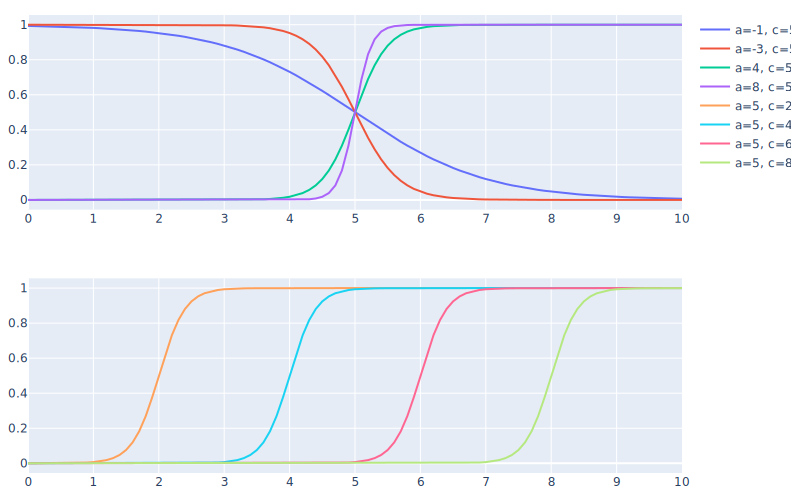

In [22]:
x = np.arange(0, 10.1, 0.1)
params = [(-1, 5), (-3, 5), (4, 5), (8, 5), (5, 2), (5, 4), (5, 6), (5, 8)]

fig = make_subplots(rows=2, cols=1)

for i, p in enumerate(params):
    a, c = p
    y = sigmf(x, a, c)
    fig.add_scatter(x=x, y=y, name=f'a={a}, c={c}', row=2**(i>3), col=1)
    
fig.update_layout(margin=dict(l=10,r=10,b=15,t=15), xaxis=dict(dtick=1), xaxis2=dict(dtick=1))
fig.show(renderer='svg', width=800, height=500)